In [3]:
import pandas as pd
import numpy as numpy
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC


In [4]:
data = pd.read_csv("/content/loan.csv")
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,2500,2500,2500,36 months,13.56,84.92,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,30000,30000,30000,60 months,18.94,777.23,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000,5000,5000,36 months,17.97,180.69,D,D1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4000,4000,4000,36 months,18.94,146.51,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,30000,30000,30000,60 months,16.14,731.78,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,desc,...,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
count,0.0,0.0,3991.000000,3991.000000,3991.000000,3991.000000,3991.000000,3.991000e+03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,16177.204961,16177.204961,16174.141819,12.604628,463.790799,8.550399e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,10407.214481,10407.214481,10409.346959,4.801542,286.969815,6.323570e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1000.000000,1000.000000,750.000000,6.000000,30.640000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,8000.000000,8000.000000,8000.000000,8.190000,251.400000,5.000000e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,14000.000000,14000.000000,14000.000000,11.800000,390.290000,7.080000e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,22400.000000,22400.000000,22400.000000,15.020000,622.680000,1.020000e+05,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,40000.000000,40000.000000,40000.000000,30.750000,1409.050000,1.120000e+06,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Columns: 145 entries, id to settlement_term
dtypes: float64(66), int64(54), object(25)
memory usage: 4.4+ MB


In [7]:
data = data.drop(data.iloc[:,139:145], axis=1)
data = data.drop(data.iloc[:,123:138], axis=1)
data = data.drop(data.iloc[:,107:122], axis=1)
data = data.drop(['id','member_id','url','desc','inq_last_6mths','mths_since_last_record',
                  'out_prncp','out_prncp_inv','total_pymnt_inv','recoveries','collection_recovery_fee',
                  'last_pymnt_d','last_credit_pull_d','mths_since_last_major_derog',
                  'policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint',
                  'tot_coll_amt','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
                  'inq_fi','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_util','mo_sin_old_il_acct',
                  'mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl',
                  'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
                  'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl',
                  'num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts',
                  'num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m',
                  'percent_bc_gt_75'],axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   3991 non-null   int64  
 1   funded_amnt                 3991 non-null   int64  
 2   funded_amnt_inv             3991 non-null   int64  
 3   term                        3991 non-null   object 
 4   int_rate                    3991 non-null   float64
 5   installment                 3991 non-null   float64
 6   grade                       3991 non-null   object 
 7   sub_grade                   3991 non-null   object 
 8   emp_title                   3404 non-null   object 
 9   emp_length                  3700 non-null   object 
 10  home_ownership              3991 non-null   object 
 11  annual_inc                  3991 non-null   float64
 12  verification_status         3991 non-null   object 
 13  issue_d                     3991 

In [9]:
data.isnull().sum()

loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
term                             0
int_rate                         0
installment                      0
grade                            0
sub_grade                        0
emp_title                      587
emp_length                     291
home_ownership                   0
annual_inc                       0
verification_status              0
issue_d                          0
loan_status                      0
pymnt_plan                       0
purpose                          0
title                            0
zip_code                         0
addr_state                       0
dti                              5
delinq_2yrs                      0
earliest_cr_line                 0
mths_since_last_delinq        2263
open_acc                         0
pub_rec                          0
revol_bal                        0
revol_util                       1
total_acc           

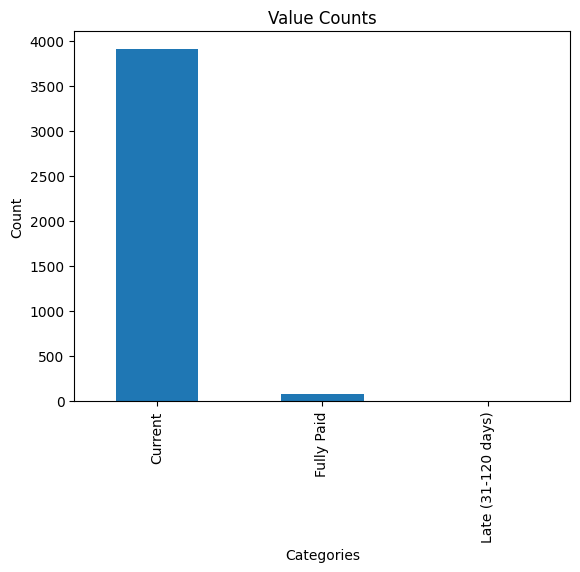

In [10]:
loan_status = data['loan_status'].value_counts()
loan_status.plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.show()

<Axes: >

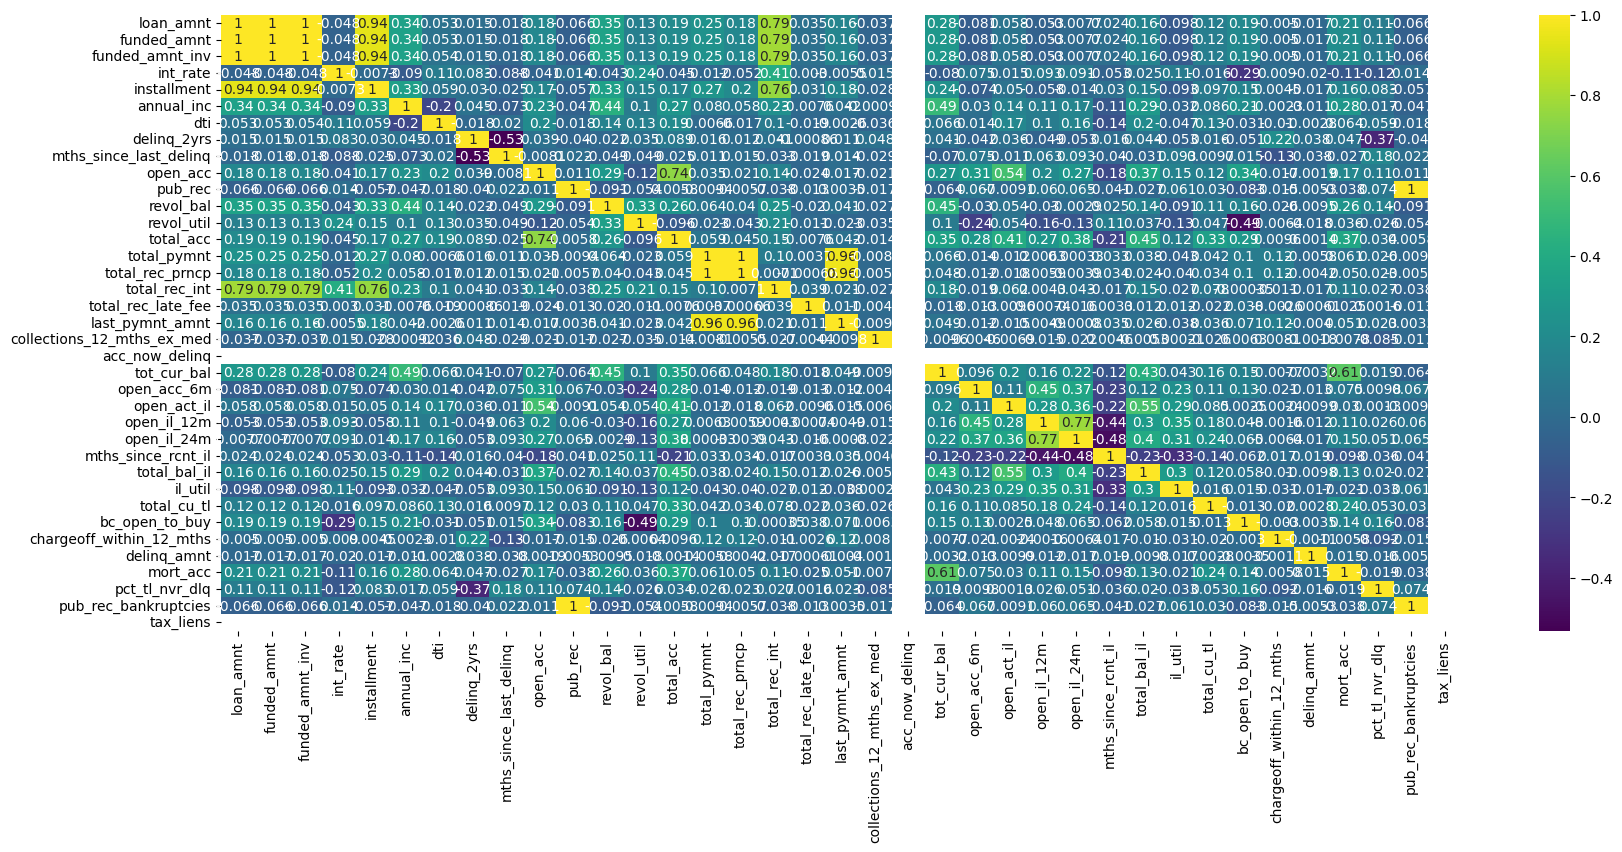

In [11]:
plt.figure(figsize=(20, 8))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

In [12]:
corr_matrix = data.corr()

# get the absolute correlation values and sort them in ascending order
abs_corr_values = corr_matrix.abs().stack().sort_values()

# get the column names with the least related correlation
least_related_cols = [pair[0] for pair in abs_corr_values.head(10).index]

# print the result
print('Least related columns:', least_related_cols)

Least related columns: ['collections_12_mths_ex_med', 'il_util', 'open_il_24m', 'total_pymnt', 'bc_open_to_buy', 'total_rec_int', 'delinq_amnt', 'total_rec_late_fee', 'total_rec_prncp', 'total_rec_late_fee']


In [13]:
data = data.drop(['delinq_2yrs', 'open_acc_6m', 'last_pymnt_amnt', 'mths_since_last_delinq',
                  'mths_since_rcnt_il', 'acc_now_delinq', 'open_il_12m'],axis=1)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   3991 non-null   int64  
 1   funded_amnt                 3991 non-null   int64  
 2   funded_amnt_inv             3991 non-null   int64  
 3   term                        3991 non-null   object 
 4   int_rate                    3991 non-null   float64
 5   installment                 3991 non-null   float64
 6   grade                       3991 non-null   object 
 7   sub_grade                   3991 non-null   object 
 8   emp_title                   3404 non-null   object 
 9   emp_length                  3700 non-null   object 
 10  home_ownership              3991 non-null   object 
 11  annual_inc                  3991 non-null   float64
 12  verification_status         3991 non-null   object 
 13  issue_d                     3991 

<Axes: >

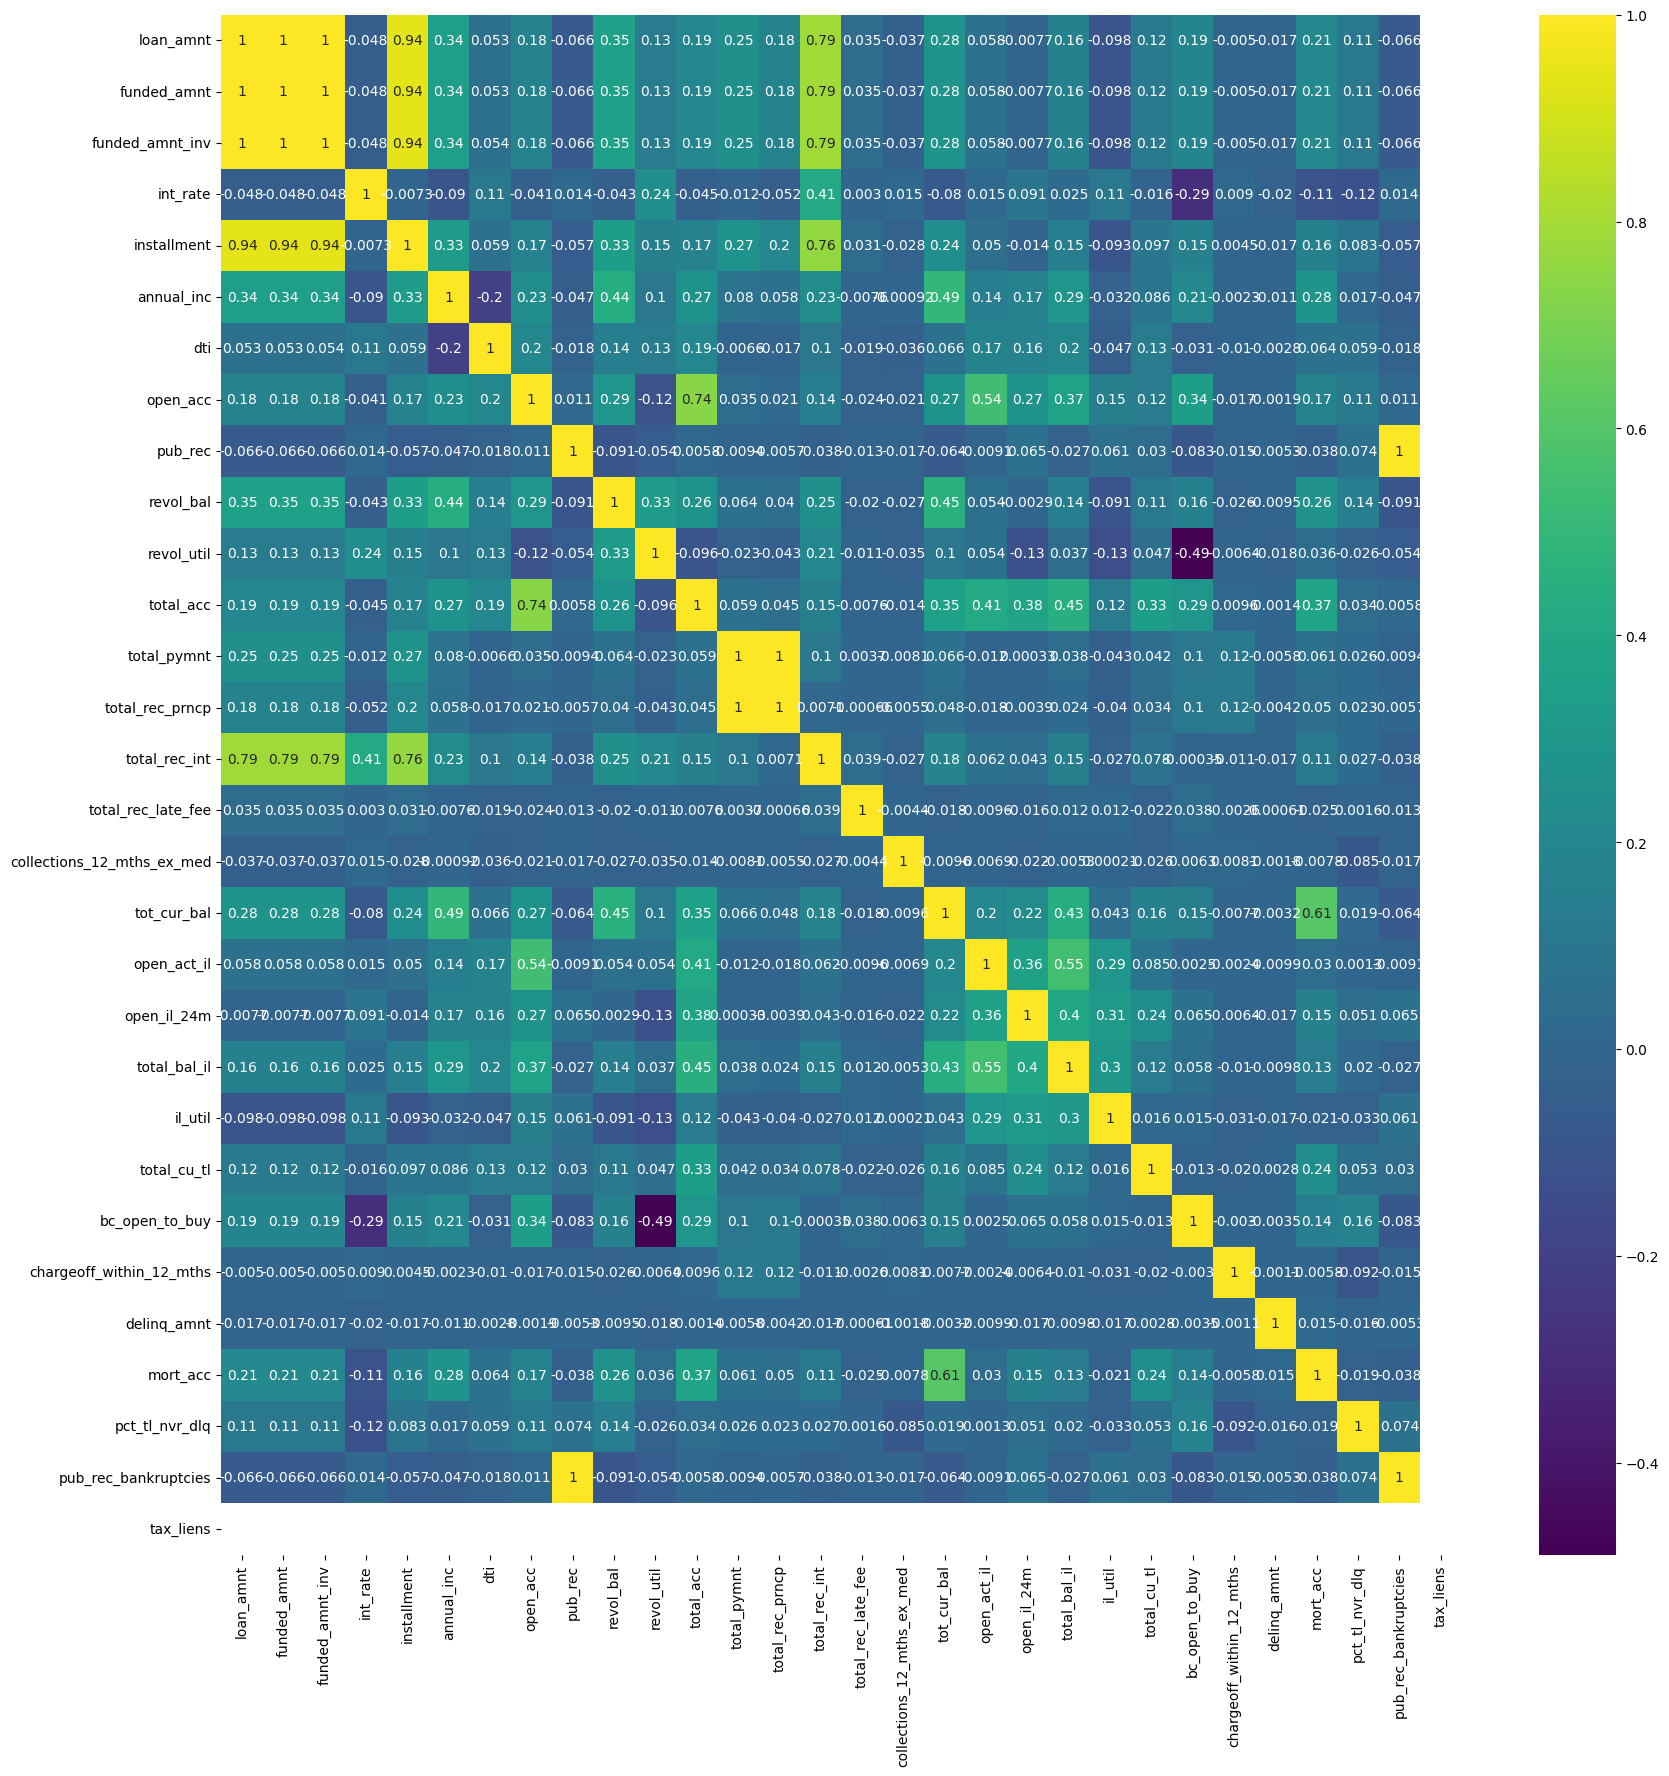

In [15]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True, cmap='viridis')

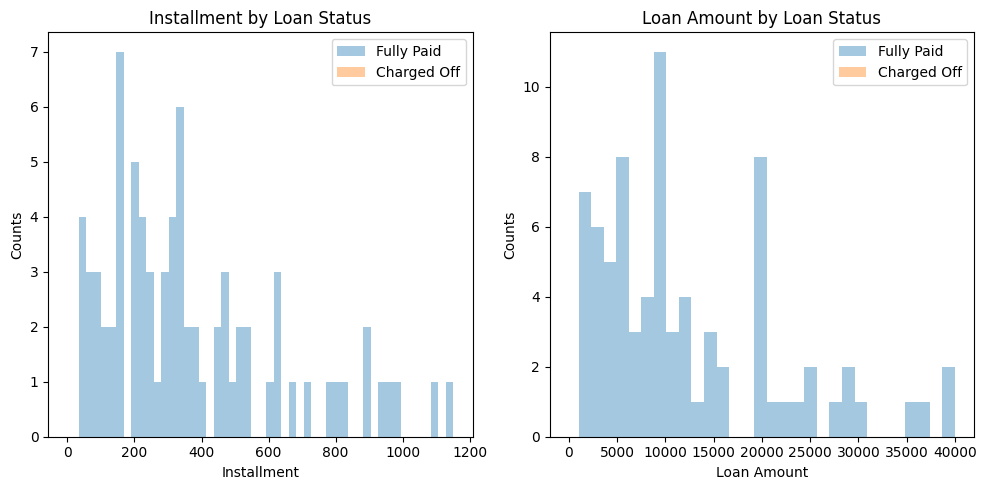

In [16]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# create histogram of installment by loan status in the first subplot
axs[0].hist(data[data['loan_status'] == 'Fully Paid']['installment'], 
            bins=50, alpha=0.4, label='Fully Paid')
axs[0].hist(data[data['loan_status'] == 'Charged Off']['installment'], 
            bins=50, alpha=0.4, label='Charged Off')
axs[0].set_xlabel('Installment')
axs[0].set_ylabel('Counts')
axs[0].set_title('Installment by Loan Status')
axs[0].legend(loc='upper right')

# create histogram of loan amount by loan status in the second subplot
axs[1].hist(data[data['loan_status'] == 'Fully Paid']['loan_amnt'], 
            bins=30, alpha=0.4, label='Fully Paid')
axs[1].hist(data[data['loan_status'] == 'Charged Off']['loan_amnt'], 
            bins=30, alpha=0.4, label='Charged Off')
axs[1].set_xlabel('Loan Amount')
axs[1].set_ylabel('Counts')
axs[1].set_title('Loan Amount by Loan Status')
axs[1].legend(loc='upper right')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

In [17]:
data.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Current,3910.0,16251.662404,10411.673201,1000.0,8000.0,14000.0,22937.5,40000.0
Fully Paid,78.0,12425.000000,9671.690179,1000.0,5000.0,10000.0,20000.0,40000.0
Late (31-120 days),3.0,16691.666667,6592.625299,9100.0,14550.0,20000.0,20487.5,20975.0


In [18]:
print(f"GRADE unique: {data.grade.unique()}")
print(f"SUB_GRADE unique: {data.sub_grade.unique()}")

GRADE unique: ['C' 'D' 'B' 'A' 'E' 'F']
SUB_GRADE unique: ['C1' 'D2' 'D1' 'C4' 'C3' 'C2' 'D5' 'B3' 'A4' 'B5' 'C5' 'D4' 'E1' 'E4'
 'B4' 'D3' 'A1' 'E5' 'B2' 'B1' 'A5' 'F5' 'A3' 'E3' 'A2' 'E2' 'F4']


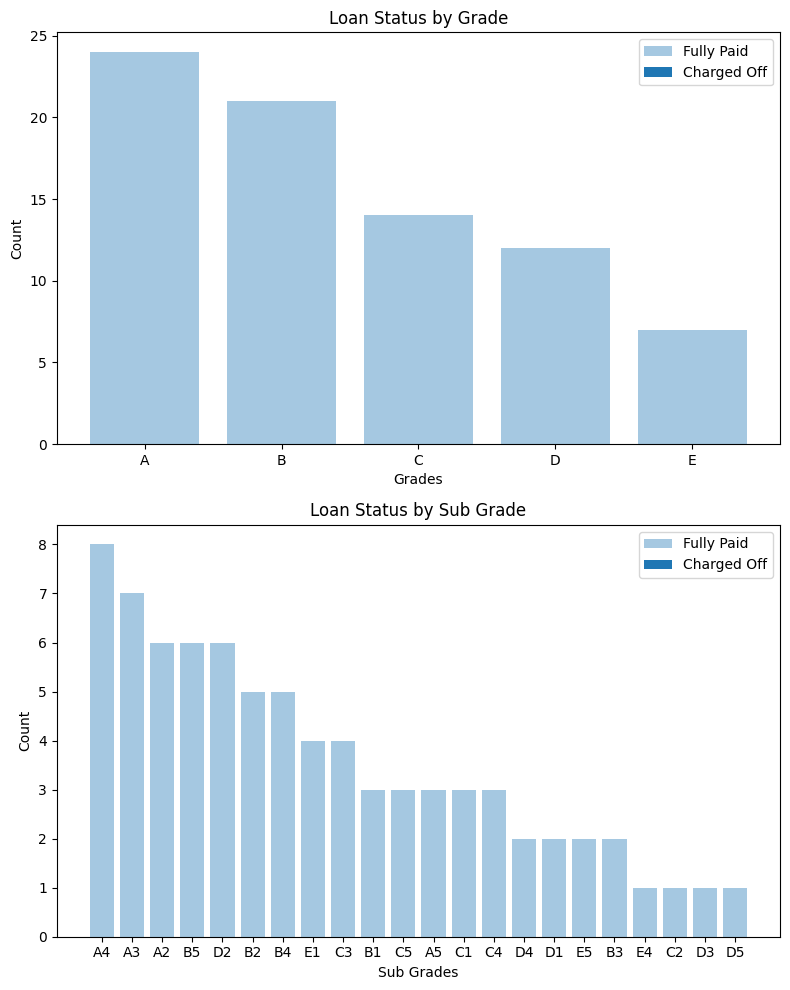

In [19]:
# create a bar chart of loan status by grade
fully_paid_grades = data.loc[data['loan_status']=='Fully Paid', 'grade'].value_counts()
charged_off_grades = data.loc[data['loan_status']=='Charged Off', 'grade'].value_counts()

fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8, 10))

axs[0].bar(fully_paid_grades.index, fully_paid_grades.values, alpha=0.4, label='Fully Paid')
axs[0].bar(charged_off_grades.index, charged_off_grades.values, alpha=0.4, label='Charged Off')
axs[0].set_xlabel('Grades')
axs[0].set_ylabel('Count')
axs[0].set_title('Loan Status by Grade')
axs[0].legend(loc='upper right')

# create a bar chart of loan status by sub grade
fully_paid_sub_grades = data.loc[data['loan_status']=='Fully Paid', 'sub_grade'].value_counts()
charged_off_sub_grades = data.loc[data['loan_status']=='Charged Off', 'sub_grade'].value_counts()

axs[1].bar(fully_paid_sub_grades.index, fully_paid_sub_grades.values, alpha=0.4, label='Fully Paid')
axs[1].bar(charged_off_sub_grades.index, charged_off_sub_grades.values, alpha=0.4, label='Charged Off')
axs[1].set_xlabel('Sub Grades')
axs[1].set_ylabel('Count')
axs[1].set_title('Loan Status by Sub Grade')
axs[1].legend(loc='upper right')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

In [20]:
data.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                     587
emp_length                    291
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             5
earliest_cr_line                0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      1
total_acc                       0
initial_list_status             0
total_pymnt                     0
total_rec_prnc

In [21]:
data['title'] = data.title.str.lower()

In [22]:
data.title.value_counts()[:10]

debt consolidation         2151
credit card refinancing    1129
other                       226
home improvement            222
major purchase               67
medical expenses             42
car financing                39
business                     35
home buying                  33
vacation                     24
Name: title, dtype: int64

In [23]:
data.dti.value_counts()

11.39    6
19.84    6
18.65    6
15.67    6
13.99    6
        ..
27.85    1
20.91    1
33.77    1
37.04    1
30.56    1
Name: dti, Length: 2394, dtype: int64

In [24]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [25]:
data['pub_rec'] = data.pub_rec.apply(pub_rec)
data['mort_acc'] = data.mort_acc.apply(mort_acc)
data['pub_rec_bankruptcies'] = data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

In [26]:
data.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                     587
emp_length                    291
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
title                           0
zip_code                        0
addr_state                      0
dti                             5
earliest_cr_line                0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      1
total_acc                       0
initial_list_status             0
total_pymnt                     0
total_rec_prnc

In [27]:
data.drop('emp_title', axis=1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_cu_tl,bc_open_to_buy,chargeoff_within_12_mths,delinq_amnt,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,hardship_flag,debt_settlement_flag
0,2500,2500,2500,36 months,13.56,84.92,C,C1,10+ years,RENT,...,11,34360.0,0,0,0,100.0,1,0,N,N
1,30000,30000,30000,60 months,18.94,777.23,D,D2,10+ years,MORTGAGE,...,15,13761.0,0,0,1,95.0,1,0,N,N
2,5000,5000,5000,36 months,17.97,180.69,D,D1,6 years,MORTGAGE,...,5,13800.0,0,0,1,100.0,0,0,N,N
3,4000,4000,4000,36 months,18.94,146.51,D,D2,10+ years,MORTGAGE,...,4,1239.0,0,0,1,100.0,0,0,N,N
4,30000,30000,30000,60 months,16.14,731.78,C,C4,10+ years,MORTGAGE,...,0,8471.0,0,0,1,92.3,0,0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3986,20000,20000,20000,36 months,7.02,617.73,A,A2,10+ years,MORTGAGE,...,1,9042.0,0,0,1,96.2,0,0,N,N
3987,6000,6000,6000,36 months,7.56,186.81,A,A3,10+ years,RENT,...,4,14606.0,0,0,0,100.0,0,0,N,N
3988,10000,10000,10000,60 months,19.92,264.50,D,D3,1 year,OWN,...,0,1183.0,0,0,0,100.0,0,0,N,N
3989,10000,10000,10000,60 months,11.80,221.44,B,B4,< 1 year,RENT,...,0,38358.0,0,0,0,100.0,0,0,N,N


In [28]:
data['purpose'].value_counts().head()

debt_consolidation    2151
credit_card           1129
other                  226
home_improvement       222
major_purchase          67
Name: purpose, dtype: int64

In [29]:
data.drop('title', axis=1, inplace=True)
data.drop('emp_length', axis=1, inplace=True)

In [30]:
data.mort_acc.value_counts()

1    2227
0    1764
Name: mort_acc, dtype: int64

In [31]:
total_acc_avg = data.groupby(by='total_acc').mean().mort_acc
def fill_mort_acc(total_acc, mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc


In [32]:
data.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                     587
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             5
earliest_cr_line                0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      1
total_acc                       0
initial_list_status             0
total_pymnt                     0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late

In [33]:
data.drop('next_pymnt_d', axis=1, inplace=True)
data.drop('il_util', axis=1, inplace=True)
data.drop('bc_open_to_buy', axis=1, inplace=True)

In [34]:
data.isnull().sum()

loan_amnt                       0
funded_amnt                     0
funded_amnt_inv                 0
term                            0
int_rate                        0
installment                     0
grade                           0
sub_grade                       0
emp_title                     587
home_ownership                  0
annual_inc                      0
verification_status             0
issue_d                         0
loan_status                     0
pymnt_plan                      0
purpose                         0
zip_code                        0
addr_state                      0
dti                             5
earliest_cr_line                0
open_acc                        0
pub_rec                         0
revol_bal                       0
revol_util                      1
total_acc                       0
initial_list_status             0
total_pymnt                     0
total_rec_prncp                 0
total_rec_int                   0
total_rec_late

In [35]:
data.drop('emp_title', axis=1, inplace=True)

In [36]:
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           5
earliest_cr_line              0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    1
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
collections_12_mths_ex_med    0
tot_cur_bal                   0
open_act

In [37]:
data = data.dropna()

In [38]:
data.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
earliest_cr_line              0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
total_pymnt                   0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
collections_12_mths_ex_med    0
tot_cur_bal                   0
open_act

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 0 to 3989
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   3984 non-null   int64  
 1   funded_amnt                 3984 non-null   int64  
 2   funded_amnt_inv             3984 non-null   int64  
 3   term                        3984 non-null   object 
 4   int_rate                    3984 non-null   float64
 5   installment                 3984 non-null   float64
 6   grade                       3984 non-null   object 
 7   sub_grade                   3984 non-null   object 
 8   home_ownership              3984 non-null   object 
 9   annual_inc                  3984 non-null   float64
 10  verification_status         3984 non-null   object 
 11  issue_d                     3984 non-null   object 
 12  loan_status                 3984 non-null   object 
 13  pymnt_plan                  3984 

In [40]:
print([column for column in data.columns if data[column].dtype == object])

['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'hardship_flag', 'debt_settlement_flag']


In [41]:
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [42]:
term_values = {' 36 months': 36, ' 60 months': 60}
data['term'] = data.term.map(term_values)

In [43]:
data.term.unique()

array([36, 60])

In [44]:
data.drop('grade', axis=1, inplace=True)

In [45]:
data.drop('issue_d', axis=1, inplace=True)

In [46]:
dummies = ['sub_grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status', 'hardship_flag', 'debt_settlement_flag']
data = pd.get_dummies(data, columns=dummies, drop_first=True)

In [47]:
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line']) # convert to datetime format
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year.astype(int) # extract the year

In [48]:
data.drop('earliest_cr_line', axis=1, inplace=True)

In [49]:
data.drop('addr_state',axis=1, inplace=True)

In [50]:
data['zip_code'] = data['zip_code'].replace(("xx", ""))

In [51]:
data = pd.get_dummies(data, columns=['zip_code'], drop_first=True)

In [52]:
pd.set_option('display.max_columns', None)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3984 entries, 0 to 3989
Columns: 758 entries, loan_amnt to zip_code_999xx
dtypes: float64(10), int64(20), object(1), uint8(727)
memory usage: 3.7+ MB


In [53]:
data['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)'], dtype=object)

In [54]:
status_mapping = {
    'Fully Paid': 1,
    'Charged Off': 0,
    'Current':1,
    'In Grace Period': 0,
    'Late (16-30 days)': 1,
    'Late (31-120 days)': 0
}

data['loan_status'] = data['loan_status'].map(status_mapping)

In [55]:
data['loan_status'].unique()

array([1, 0])

In [56]:
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(train.shape)
print(test.shape)

(3187, 758)
(797, 758)


In [57]:
print(train[train['dti'] <= 50].shape)
print(train.shape)

(3134, 758)
(3187, 758)


In [58]:
print(train.shape)
train = train[train['annual_inc'] <= 250000]
train = train[train['dti'] <= 50]
train = train[train['open_acc'] <= 40]
train = train[train['total_acc'] <= 80]
train = train[train['revol_util'] <= 120]
train = train[train['revol_bal'] <= 250000]
print(train.shape)

(3187, 758)
(3070, 758)


In [59]:
X_train, y_train = train.drop('loan_status', axis=1), train.loan_status
X_test, y_test = test.drop('loan_status', axis=1), test.loan_status

In [60]:
X_train.dtypes

loan_amnt            int64
funded_amnt          int64
funded_amnt_inv      int64
term                 int64
int_rate           float64
                    ...   
zip_code_993xx       uint8
zip_code_995xx       uint8
zip_code_996xx       uint8
zip_code_997xx       uint8
zip_code_999xx       uint8
Length: 757, dtype: object

In [61]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
xgb = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100)

In [63]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [64]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
        
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [65]:
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
             0       1  accuracy  macro avg  weighted avg
precision  1.0     1.0       1.0        1.0           1.0
recall     1.0     1.0       1.0        1.0           1.0
f1-score   1.0     1.0       1.0        1.0           1.0
support    3.0  3067.0       1.0     3070.0        3070.0
_______________________________________________
Confusion Matrix: 
 [[   3    0]
 [   0 3067]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               1  accuracy  macro avg  weighted avg
precision    1.0       1.0        1.0           1.0
recall       1.0       1.0        1.0           1.0
f1-score     1.0       1.0        1.0           1.0
support    797.0       1.0      797.0         797.0
_______________________________________________
Confusion Matrix: 
 [[797]]



In [66]:
#ANN IMPLEMENTING

def evaluate_nn(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")
    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

def plot_learning_evolution(r):
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.plot(r.history['loss'], label='Loss')
    plt.plot(r.history['val_loss'], label='val_Loss')
    plt.title('Loss evolution during trainig')
    plt.legend()

    plt.subplot(2, 2, 2)
    plt.plot(r.history['AUC'], label='AUC')
    plt.plot(r.history['val_AUC'], label='val_AUC')
    plt.title('AUC score evolution during trainig')
    plt.legend();

def nn_model(num_columns, num_labels, hidden_units, dropout_rates, learning_rate):
    inp = tf.keras.layers.Input(shape=(num_columns, ))
    x = BatchNormalization()(inp)
    x = Dropout(dropout_rates[0])(x)
    for i in range(len(hidden_units)):
        x = Dense(hidden_units[i], activation='relu')(x)
        x = BatchNormalization()(x)
        x = Dropout(dropout_rates[i + 1])(x)
    x = Dense(num_labels, activation='sigmoid')(x)
  
    model = Model(inputs=inp, outputs=x)
    model.compile(optimizer=Adam(learning_rate), loss='binary_crossentropy', metrics=[AUC(name='AUC')])
    return model

In [67]:
num_columns = X_train.shape[1]
num_labels = 1
hidden_units = [150, 150, 150]
dropout_rates = [0.1, 0, 0.1, 0]
learning_rate = 1e-3


model = nn_model(
    num_columns=num_columns, 
    num_labels=num_labels,
    hidden_units=hidden_units,
    dropout_rates=dropout_rates,
    learning_rate=learning_rate
)
r = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
96/96 [==============================] - 4s 12ms/step - loss: 0.4920 - AUC: 0.3701 - val_loss: 0.2227 - val_AUC: 0.0000e+00
Epoch 2/20
96/96 [==============================] - 1s 9ms/step - loss: 0.1273 - AUC: 0.8496 - val_loss: 0.0419 - val_AUC: 0.0000e+00
Epoch 3/20
96/96 [==============================] - 1s 10ms/step - loss: 0.0341 - AUC: 0.9920 - val_loss: 0.0184 - val_AUC: 0.0000e+00
Epoch 4/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0149 - AUC: 0.9996 - val_loss: 0.0093 - val_AUC: 0.0000e+00
Epoch 5/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0089 - AUC: 0.9992 - val_loss: 0.0063 - val_AUC: 0.0000e+00
Epoch 6/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0057 - AUC: 1.0000 - val_loss: 0.0058 - val_AUC: 0.0000e+00
Epoch 7/20
96/96 [==============================] - 1s 9ms/step - loss: 0.0035 - AUC: 1.0000 - val_loss: 0.0090 - val_AUC: 0.0000e+00
Epoch 8/20
96/96 [==============================] - 1s 10ms/

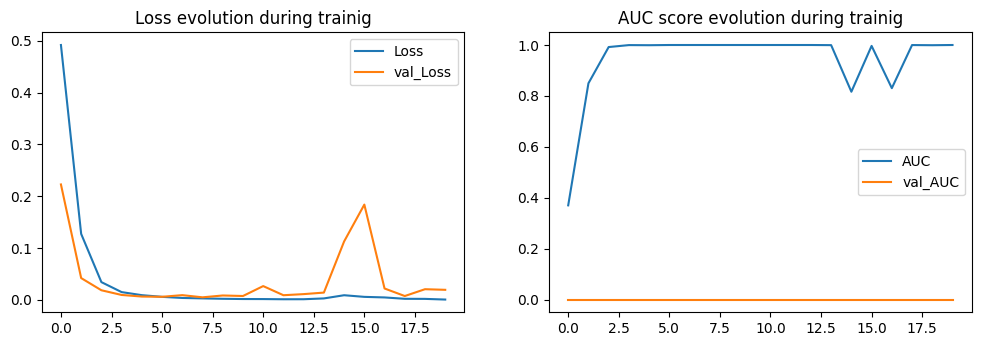

In [68]:
plot_learning_evolution(r)

In [69]:
y_train_pred = model.predict(X_train)
evaluate_nn(y_train, y_train_pred.round(), train=True)

96/96 [==============================] - 0s 2ms/step
Train Result:
Accuracy Score: 99.90%
_______________________________________________
CLASSIFICATION REPORT:
                  0            1  accuracy    macro avg  weighted avg
precision  0.500000     1.000000  0.999023     0.750000      0.999511
recall     1.000000     0.999022  0.999023     0.999511      0.999023
f1-score   0.666667     0.999511  0.999023     0.833089      0.999185
support    3.000000  3067.000000  0.999023  3070.000000   3070.000000
_______________________________________________
Confusion Matrix: 
 [[   3    0]
 [   3 3064]]



In [70]:
y_test_pred = model.predict(X_test)
evaluate_nn(y_test, y_test_pred.round(), train=False)

25/25 [==============================] - 0s 3ms/step
Test Result:
Accuracy Score: 99.75%
_______________________________________________
CLASSIFICATION REPORT:
           0.0         1.0  accuracy   macro avg  weighted avg
precision  0.0    1.000000  0.997491    0.500000      1.000000
recall     0.0    0.997491  0.997491    0.498745      0.997491
f1-score   0.0    0.998744  0.997491    0.499372      0.998744
support    0.0  797.000000  0.997491  797.000000    797.000000
_______________________________________________
Confusion Matrix: 
 [[  0   0]
 [  2 795]]



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
